## Importing the requirements

In [1]:
import numpy as np, pandas as pd # importing the requirements

In [2]:
election_dataset=pd.read_csv("election_results_2024.csv", encoding='utf-8-sig') # loading the dataset
election_dataset.shape # returns the number of rows and columns of the table

(543, 8)

## Inspecting and Exploring the data


In [3]:
election_dataset.head() # preprocessing the data

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


In [4]:
election_dataset.tail()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
538,Wardha,8,AMAR SHARADRAO KALE,Nationalist Congress Party – Sharadchandra Pawar,RAMDAS CHANDRABHAN TADAS,Bharatiya Janata Party,81648,Result Declared
539,Wayanad,4,RAHUL GANDHI,Indian National Congress,ANNIE RAJA,Communist Party of India,364422,Result Declared
540,West Delhi,6,KAMALJEET SEHRAWAT,Bharatiya Janata Party,MAHABAL MISHRA,Aam Aadmi Party,199013,Result Declared
541,Yavatmal- Washim,14,SANJAY UTTAMRAO DESHMUKH,Shiv Sena (Uddhav Balasaheb Thackrey),RAJSHRITAI HEMANT PATIL (MAHALLE),Shiv Sena,94473,Result Declared
542,Zahirabad,5,SURESH KUMAR SHETKAR,Indian National Congress,B. B. PATIL,Bharatiya Janata Party,46188,Result Declared


In [5]:
election_dataset.describe()

,Const. No.
count,543.000000
mean,18.178637
std,16.427840
min,1.000000
25%,6.000000
50%,14.000000
75%,25.000000
max,80.000000


In [6]:
election_dataset.describe(include="object").transpose()


,count,unique,top,freq
Constituency,543,541,Aurangabad,2
Leading Candidate,543,542,RAHUL GANDHI,2
Leading Party,543,42,Bharatiya Janata Party,240
Trailing Candidate,542,542,RAMCHANDRA CHOUDHARY,1
Trailing Party,542,42,Indian National Congress,167
Margin,543,543,329991,1
Status,543,2,Result Declared,542


Observations:
* Aurangabad appeared twice which points towards the issue.
* Rahul Gandhi appeared twice because he has participated in two constituency.
* BJP is the leading party with a good control over 240 constituencies with 42 unique parties.
* INC appears to be trailing party in 167 constituencies.
* Margin is unique for each constituencies with 329991 as the highest.
* Result status have been declared for 542 constituencies, indicating the result of one constituency is still pending.

In [7]:
election_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


* Trailing Candidate and Trailing Party contains the null values, Here it's clear that out of 543 entries 542 are non null and 1 is null value for the both of the columns.
* Margin column is of object type.

# Updating the encountered problems with the dataset


In [8]:
# converting the margin colum to numeric:
election_dataset["Margin"]=pd.to_numeric(election_dataset["Margin"], errors="coerce")

In [9]:
# filling the null values in the studied two columns
election_dataset = election_dataset.fillna({
    "Trailing Candidate":"N/A", 
    "Trailing Party":"N/A"
    })

In [10]:
election_dataset[election_dataset["Constituency"]=="Aurangabad"]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
41,Aurangabad,19,BHUMARE SANDIPANRAO ASARAM,Shiv Sena,IMTIAZ JALEEL SYED,All India Majlis-E-Ittehadul Muslimeen,134650.0,Result Declared
42,Aurangabad,37,ABHAY KUMAR SINHA,Rashtriya Janata Dal,SUSHIL KUMAR SINGH,Bharatiya Janata Party,79111.0,Result Declared


Bhumare Asaram won lok sabha election at Aurangabad of Maharashtra
whereas Abhay Kumar won at Arurangabad of Bihar


In [11]:
election_dataset.loc[election_dataset["Constituency"]=="Aurangabad", "Constituency"]=["Aurangabad (Maharashtra)", "Aurangabad (Bihar)"]

In [12]:
# verifying the updated values
election_dataset[41:43]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
41,Aurangabad (Maharashtra),19,BHUMARE SANDIPANRAO ASARAM,Shiv Sena,IMTIAZ JALEEL SYED,All India Majlis-E-Ittehadul Muslimeen,134650.0,Result Declared
42,Aurangabad (Bihar),37,ABHAY KUMAR SINHA,Rashtriya Janata Dal,SUSHIL KUMAR SINGH,Bharatiya Janata Party,79111.0,Result Declared


In [13]:
leading_party_counts=election_dataset["Leading Party"].value_counts()
leading_party_counts

Leading Party
Bharatiya Janata Party                                      240
Indian National Congress                                     99
Samajwadi Party                                              37
All India Trinamool Congress                                 29
Dravida Munnetra Kazhagam                                    22
Telugu Desam                                                 16
Janata Dal (United)                                          12
Shiv Sena (Uddhav Balasaheb Thackrey)                         9
Nationalist Congress Party – Sharadchandra Pawar              8
Independent                                                   7
Shiv Sena                                                     7
Lok Janshakti Party(Ram Vilas)                                5
Communist Party of India (Marxist)                            4
Yuvajana Sramika Rythu Congress Party                         4
Rashtriya Janata Dal                                          4
Aam Aadmi Party           

In [14]:
other_party_counts=leading_party_counts[leading_party_counts<5].sum()
other_party_counts

np.int64(52)

In [15]:
leading_party_counts = leading_party_counts[leading_party_counts>=5] # will allow only the entries of the parties having count greater than 5 
leading_party_counts["Others"]=other_party_counts # add a category into the leading party containing all the parties having count less than 5 
leading_party_counts

Leading Party
Bharatiya Janata Party                              240
Indian National Congress                             99
Samajwadi Party                                      37
All India Trinamool Congress                         29
Dravida Munnetra Kazhagam                            22
Telugu Desam                                         16
Janata Dal (United)                                  12
Shiv Sena (Uddhav Balasaheb Thackrey)                 9
Nationalist Congress Party – Sharadchandra Pawar      8
Independent                                           7
Shiv Sena                                             7
Lok Janshakti Party(Ram Vilas)                        5
Others                                               52
Name: count, dtype: int64

## Data Visualization

In [16]:
from matplotlib import pyplot as plt

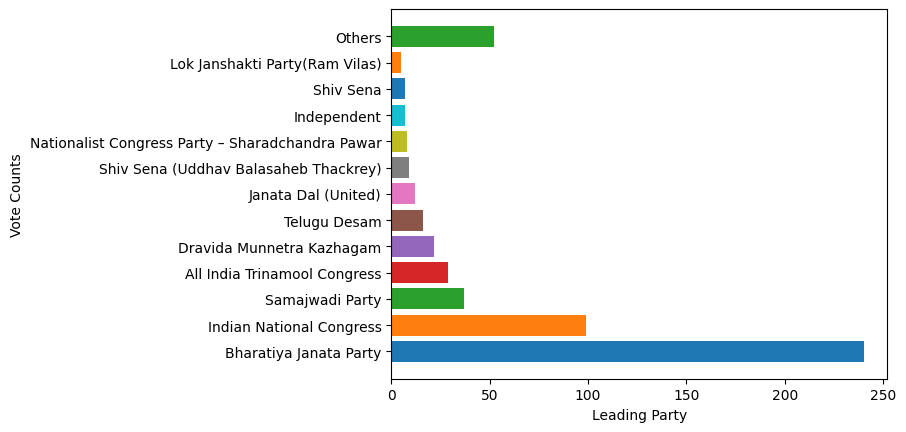

In [31]:
plt.barh(leading_party_counts.index, leading_party_counts.values, color=plt.cm.tab10.colors)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Leading Party")
plt.ylabel("Vote Counts")
plt.title("")
plt.show()

In [18]:
from matplotlib.patches import Patch

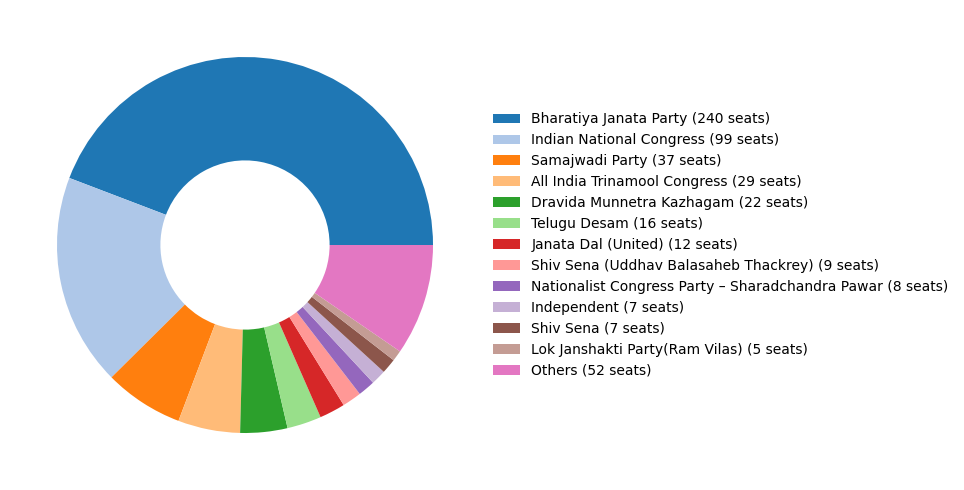

In [19]:
fig, ax = plt.subplots(figsize=(10,5))
party_names=list(leading_party_counts.index)
party_counts=list(leading_party_counts.values)
colors= plt.cm.tab20.colors

plt.pie(
    party_counts,
    colors=colors,
    wedgeprops = {"width": 0.55}, # donut hole size increases on reducing the width. Width ranges from 0 to 1(indcluding 0 and 1)
)

legend_patches =[Patch(facecolor=colors[i], label=f"{
    party_names[i]} ({party_counts[i]} seats)")
    for i in range(len(party_names))
    ]

ax.legend(
    handles= legend_patches,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    frameon=False,
)


plt.tight_layout()
plt.show()

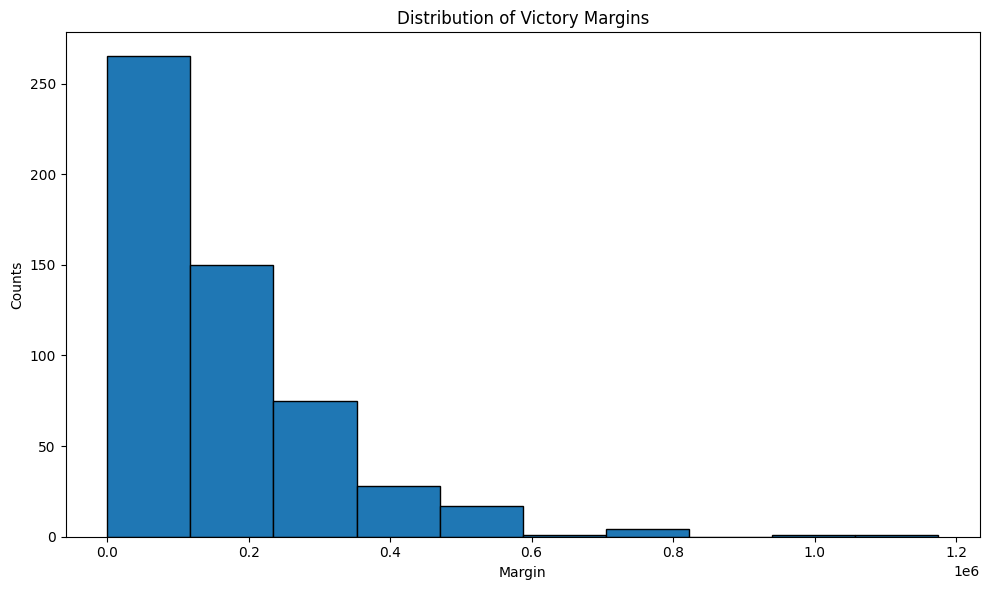

In [20]:
# plt.subplots(figsize=(10,6))
plt.figure(figsize=(10,6))
plt.hist(data=election_dataset, x="Margin",edgecolor="black", )
plt.title("Distribution of Victory Margins")
plt.xlabel("Margin")
plt.ylabel("Counts")
plt.tight_layout()
plt.show()

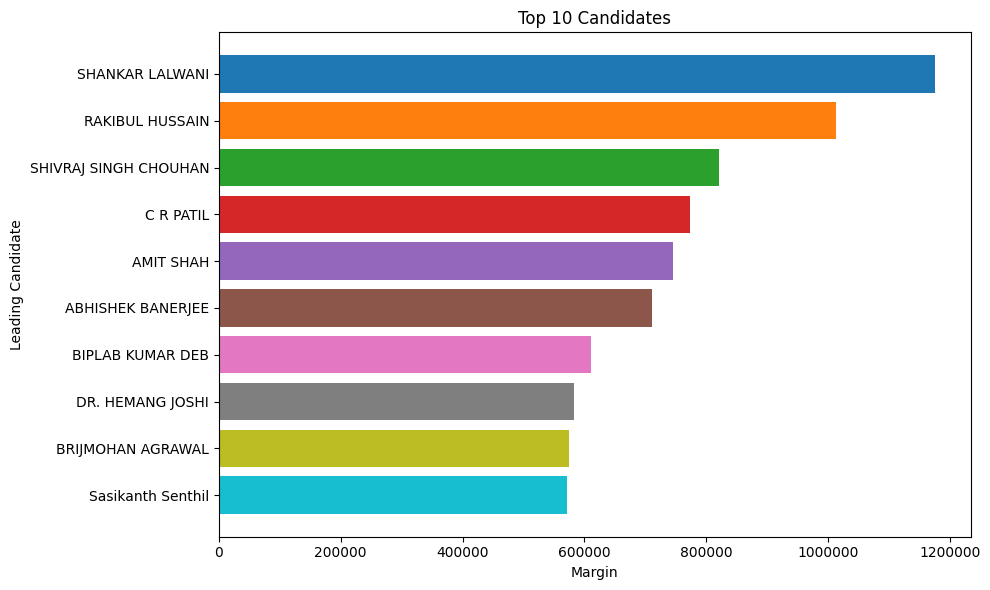

In [26]:
top_10_winners=election_dataset.sort_values(by="Margin", ascending=False).head(10)
plt.figure(figsize=(10,6))
plt.barh(top_10_winners["Leading Candidate"], top_10_winners["Margin"], color =plt.cm.tab10.colors)
plt.gca().invert_yaxis()
plt.xlabel("Margin")
plt.ylabel("Leading Candidate")
plt.title("Top 10 Candidates")
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()